In [1]:
import mrob
import numpy as np
import math

In [2]:
graph = mrob.FGraph()

In [3]:
graph.add_factor_1pose_3d?

Docstring: add_factor_1pose_3d(self: mrob.mrob.FGraph, arg0: mrob.mrob.geometry.SE3, arg1: int, arg2: numpy.ndarray[numpy.float64[6, 6]]) -> int
Type:      method

In [56]:
# graph.add_node_landmark_3d()
# point description - params by descriptor (by image)
#  
# image -> feature -> 3d_feature_coords -> descriptor -> add/update to mrob
# possible descriptors: orb/nn/
#
# descriptor ->desciption 
# 
#
#
# optimize only robot_trajectory
#
# how to optimize feature comparison (k-neighbours etc)
#   
# 

In [4]:
import cv2
from matplotlib import pyplot as plt
def show_img(img):
    plt.figure(figsize=(14,8))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.plot()

In [5]:
img_1 = cv2.imread('datasets/rgbd_dataset_freiburg1_xyz/rgb/1305031102.175304.png')
depth_1 = cv2.imread('datasets/rgbd_dataset_freiburg1_xyz/depth/1305031102.160407.png', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('datasets/rgbd_dataset_freiburg1_xyz/rgb/1305031102.211214.png')

In [6]:
def match_images(img_1, img_2):
    img1 = img_1.copy()
    img2 = img_2.copy()
    # orb = cv2.ORB_create()
    sift = cv2.SIFT_create() 
    kp_1, des_1 = sift.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY), None)
    kp_2, des_2 = sift.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY), None)
    print(des_1.shape)
    print(des_2.shape)
    bf = cv2.BFMatcher()  
    # matches = bf.match(des_1, des_2)
    matches = bf.knnMatch(des_1, des_2, k=2)
    
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.3*n.distance:
            good.append([m])


    # print(matches)
    img1 = cv2.drawKeypoints(img1, kp_1, None, color=(0,255,0), flags=0)
    # show_img(img1)
    img2 = cv2.drawKeypoints(img2, kp_2, None, color=(0,255,0), flags=0)
    # show_img(img2)
    img3 = cv2.drawMatchesKnn(img1,kp_1,img2,kp_2,good, None, flags=2)
    show_img(img3)
    return kp_1,kp_2,good, des_1, des_2

In [10]:
def match_images_v2(img_1, img_2):
    img1 = img_1.copy()
    img2 = img_2.copy()
    # orb = cv2.ORB_create()
    orb = cv2.ORB_create()
    kp_1, des_1 = orb.detectAndCompute(img1, None)
    kp_2, des_2 = orb.detectAndCompute(img2, None)
    print(des_1.shape)
    print(des_2.shape)
    bf = cv2.BFMatcher()  
    # matches = bf.match(des_1, des_2)
    matches = bf.knnMatch(des_1, des_2, k=2)
    
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append([m])


    # print(matches)
    img1 = cv2.drawKeypoints(img1, kp_1, None, color=(0,255,0), flags=0)
    # show_img(img1)
    img2 = cv2.drawKeypoints(img2, kp_2, None, color=(0,255,0), flags=0)
    # show_img(img2)
    img3 = cv2.drawMatchesKnn(img1,kp_1,img2,kp_2,good, None, flags=2)
    show_img(img3)
    return kp_1,kp_2,good, des_1, des_2

In [11]:
a, b = map(int, (kp1[0].pt))

NameError: name 'kp1' is not defined

In [12]:
a, b

NameError: name 'a' is not defined

(500, 32)
(500, 32)


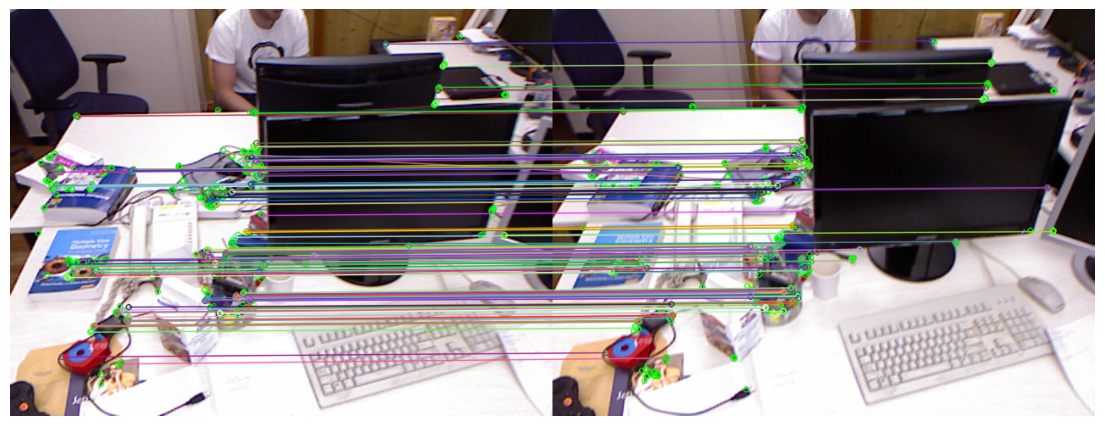

In [13]:
kp1, kp2, matched, des1, des2 = match_images_v2(img_1,img_2)

In [14]:
p1 = []
p2 = []

for match in matched:
    p1.append(match[0].queryIdx)
    p2.append(kp2[match[0].trainIdx].pt)

In [15]:
kp1

(< cv2.KeyPoint 000002D5DB2880F0>,
 < cv2.KeyPoint 000002D5DB288210>,
 < cv2.KeyPoint 000002D5DB2B5B60>,
 < cv2.KeyPoint 000002D5DB2B5320>,
 < cv2.KeyPoint 000002D5DB2B66A0>,
 < cv2.KeyPoint 000002D5DB2B7BA0>,
 < cv2.KeyPoint 000002D5DB2B5920>,
 < cv2.KeyPoint 000002D5DC2DA610>,
 < cv2.KeyPoint 000002D5DC2DA160>,
 < cv2.KeyPoint 000002D5DC336D90>,
 < cv2.KeyPoint 000002D5DB2C5050>,
 < cv2.KeyPoint 000002D5DB2C4CF0>,
 < cv2.KeyPoint 000002D5DB2C6FA0>,
 < cv2.KeyPoint 000002D5DB2C7690>,
 < cv2.KeyPoint 000002D5DB2C5C20>,
 < cv2.KeyPoint 000002D5DB2C7420>,
 < cv2.KeyPoint 000002D5DB2C7900>,
 < cv2.KeyPoint 000002D5DB2C7240>,
 < cv2.KeyPoint 000002D5DC3226A0>,
 < cv2.KeyPoint 000002D5DC320270>,
 < cv2.KeyPoint 000002D5DC322C70>,
 < cv2.KeyPoint 000002D5DC322940>,
 < cv2.KeyPoint 000002D5DC322370>,
 < cv2.KeyPoint 000002D5DC320D80>,
 < cv2.KeyPoint 000002D5DC3235A0>,
 < cv2.KeyPoint 000002D5DC3227F0>,
 < cv2.KeyPoint 000002D5DC323BD0>,
 < cv2.KeyPoint 000002D5DC320AE0>,
 < cv2.KeyPoint 0000

In [123]:
kp2

(< cv2.KeyPoint 0x7efd0c410b10>,
 < cv2.KeyPoint 0x7efd0c410ae0>,
 < cv2.KeyPoint 0x7efd0c410630>,
 < cv2.KeyPoint 0x7efd0c410600>,
 < cv2.KeyPoint 0x7efd0c410810>,
 < cv2.KeyPoint 0x7efd0c410840>,
 < cv2.KeyPoint 0x7efd0c4107b0>,
 < cv2.KeyPoint 0x7efd0c4105d0>,
 < cv2.KeyPoint 0x7efd0c4104b0>,
 < cv2.KeyPoint 0x7efd0c410450>,
 < cv2.KeyPoint 0x7efd0c410540>,
 < cv2.KeyPoint 0x7efd0c410d20>,
 < cv2.KeyPoint 0x7efd0c410fc0>,
 < cv2.KeyPoint 0x7efd0c410d50>,
 < cv2.KeyPoint 0x7efd0c4108d0>,
 < cv2.KeyPoint 0x7efd0c410930>,
 < cv2.KeyPoint 0x7efd0c410960>,
 < cv2.KeyPoint 0x7efd0c410bd0>,
 < cv2.KeyPoint 0x7efd0c410ea0>,
 < cv2.KeyPoint 0x7efd0c410e70>,
 < cv2.KeyPoint 0x7efd0c410f00>,
 < cv2.KeyPoint 0x7efd0c410ed0>,
 < cv2.KeyPoint 0x7efd0c411110>,
 < cv2.KeyPoint 0x7efd0c4111a0>,
 < cv2.KeyPoint 0x7efd0c411200>,
 < cv2.KeyPoint 0x7efd0c410f90>,
 < cv2.KeyPoint 0x7efd0c4111d0>,
 < cv2.KeyPoint 0x7efd0c411140>,
 < cv2.KeyPoint 0x7efd0c411170>,
 < cv2.KeyPoint 0x7efd0c4110b0>,
 < cv2.Key

In [64]:
len(p2)

163

In [65]:
len(kp2)

500

In [66]:
def get_pixel_coordinates(img, depth):
    pass

In [67]:

depth_instensity = np.array(256 * depth_1 / 0x0fff,
                            dtype=np.uint8)

In [68]:
print(depth_1.max())
# depth_1 *=3

72


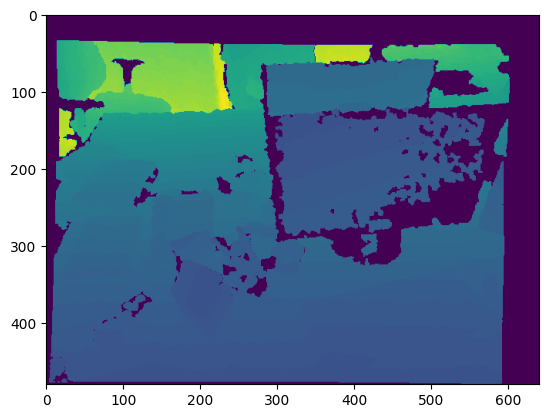

In [69]:
plt.imshow(depth_1)

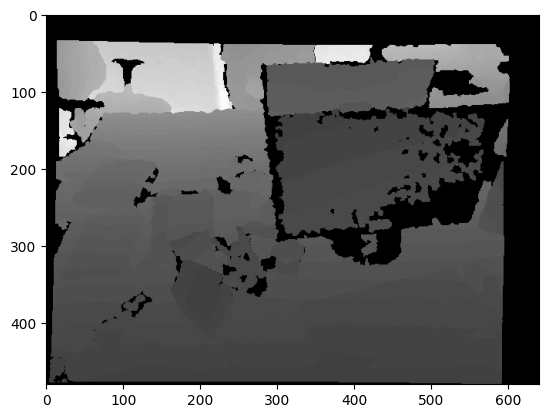

In [70]:
plt.imshow(depth_1,cmap='gray')

In [71]:
# # Depth camera parameters:
# FX_DEPTH = cam_params[0,0]
# FY_DEPTH = cam_params[1,1]
# CX_DEPTH = cam_params[0,2]
# CY_DEPTH = cam_params[1,2]

FX_DEPTH = 525.0  # focal length x
FY_DEPTH = 525.0  # focal length y
CX_DEPTH = 319.5  # optical center x
CY_DEPTH = 239.5  # optical center y

In [72]:
# compute point cloud:
factor = 5000 # for the 16-bit PNG files
pcd = []
height, width = depth_1.shape
for i in range(height):
   for j in range(width):
       if(depth_1[i][j] == 0):
           continue
       z = depth_1[i][j]/factor
       x = (j - CX_DEPTH) * z / FX_DEPTH
       y = (i - CY_DEPTH) * z / FY_DEPTH
       pcd.append([x, y, z])

In [73]:
import open3d as o3d

In [74]:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

In [75]:
a

{0: 'dasd', 1: 'dade'}

In [76]:
np.asarray(list(a.keys()))

array([0, 1])

In [77]:
bf = cv2.BFMatcher()

In [83]:
des1

array([[  9, 255, 122, ..., 136, 135, 251],
       [213, 204, 142, ..., 120, 248,  14],
       [232, 185,  58, ...,   0, 198, 187],
       ...,
       [131,  94, 123, ..., 208,  33, 121],
       [189,  88,  87, ..., 179, 102, 188],
       [138,  28, 182, ...,  68, 173, 222]], dtype=uint8)

In [79]:
des1

array([[  9, 255, 122, ..., 136, 135, 251],
       [213, 204, 142, ..., 120, 248,  14],
       [232, 185,  58, ...,   0, 198, 187],
       ...,
       [131,  94, 123, ..., 208,  33, 121],
       [189,  88,  87, ..., 179, 102, 188],
       [138,  28, 182, ...,  68, 173, 222]], dtype=uint8)

In [80]:
des2 

array([[105, 139, 123, ..., 138, 112,  41],
       [  6, 141,  14, ...,  90, 177, 128],
       [ 16, 207, 107, ..., 128, 180, 232],
       ...,
       [ 33,  79, 199, ..., 179, 120, 188],
       [202, 188, 182, ...,  68, 175, 222],
       [ 41,  77, 183, ..., 168, 208,  40]], dtype=uint8)

In [147]:
a = np.array([2, 3, 4, 6, 8])

In [145]:
a

[2, 3, 4, 6, 8]

In [152]:
idx = [(0), (2), (3)]

In [153]:
a[idx]

array([2, 4, 6])